## Hello everyone,
### Welcome to my notebook As we know our problem statement is to identify the Type of Music

Now,

Importing the required Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score

### Importing dataset into pandas

1.Importing the data into our pandas.

2.Train (saving are training dataset ).

3.Test (saving are testing dataset)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

### Saving prediction file

-We need to create a dataframe 
- Need to save the index file (instance_id)

In [3]:
def download_preds(preds_test, file_name = 'sub.csv'):

#      df = pd.DataFrame()
     ## 1. Setting the target column with our obtained predictions
     sub['instance_id'] = test['instance_id']
     sub['music_genre'] = preds_test
     ## 2. Saving our predictions to a csv file
     sub.to_csv(file_name, index = False)

In [4]:
sub.head()

,instance_id,music_genre
0,MSC_83537.0,Jazz
1,MSC_22044.0,Jazz
2,MSC_62017.0,Rap
3,MSC_76365.0,Rock
4,MSC_71493.0,Classical


### Performing Basic EDA

In [5]:
train.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical


In [6]:
test.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,MSC_70753.0,"Bard, a Man of Lake-town - Extended Version",26.101,0.823765,0.115490,211462.287,0.125325,0.945272,Scale A Sharp,0.120392,-25.541,Both,Minor,0.038657,80.777,Duet,0.041238
1,MSC_24064.0,New Kings,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,Scale E,0.406722,-3.905,Male,?,0.051368,76.00399999999999,Band,0.456309
2,MSC_22731.0,Silver Lining,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,Scale C,0.084608,-6.825,Female,Major,0.034303,144.458,Solo,0.193332
3,MSC_32095.0,A Tale That Wasn't Right,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,Scale A,0.276811,-8.382,Female,Minor,0.036934,118.145,Solo,0.214906
4,MSC_24198.0,Get Ready,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,Scale D,0.301726,-4.733,Both,Major,0.079688,95.012,Duet,0.757347


In [7]:
train.isnull().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

In [8]:
test.isnull().sum()

instance_id            0
track_name             0
popularity           166
acousticness           0
danceability         139
duration_ms           21
energy                33
instrumentalness      23
key                    0
liveness               0
loudness               3
voice_gender         186
mode                  14
speechiness            7
tempo                  0
musician_category    312
valence              191
dtype: int64

In [9]:
train.shape,test.shape

((15681, 18), (3921, 17))

In [10]:
train.dtypes

instance_id           object
track_name            object
popularity           float64
acousticness         float64
danceability         float64
duration_ms          float64
energy               float64
instrumentalness     float64
key                   object
liveness             float64
loudness             float64
voice_gender          object
mode                  object
speechiness          float64
tempo                 object
musician_category     object
valence              float64
music_genre           object
dtype: object

In [11]:
test.dtypes

instance_id           object
track_name            object
popularity           float64
acousticness         float64
danceability         float64
duration_ms          float64
energy               float64
instrumentalness     float64
key                   object
liveness             float64
loudness             float64
voice_gender          object
mode                  object
speechiness          float64
tempo                 object
musician_category     object
valence              float64
dtype: object

## After the Exploration of data,
## What we got to know
1.Shape or our data.

2.Null / Missing values in our Dataset.



## Visualizing the Data,

1.From Seaborn Countplot.

2.Heatmap for viewing the strength and directions.

3.By this we able to see Positive/Negative correlation between feature.


C:\Users\Trapti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='music_genre', ylabel='count'>

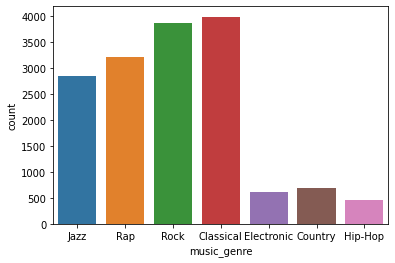

In [12]:
sns.countplot(train['music_genre'])

<AxesSubplot:>

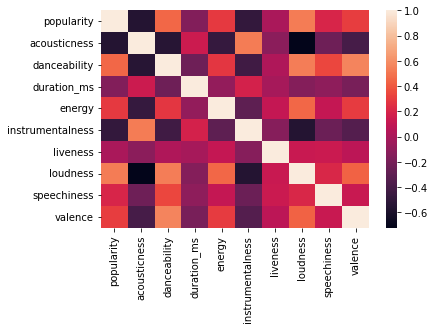

In [13]:
sns.heatmap(train.corr())

## Feature Engineering part

1.Filling the Null values

2.Converting the categrical features into numeric for better performance of our Model.

3.Dropping irrelevant Feature.

4.Recheck the Data

In [14]:
def fill_missing_values(train):
    missing_val_columns = train.isnull().sum()[train.isnull().sum() > 0]
    missing_val_columns = list(missing_val_columns.index)
    for col in missing_val_columns:
        mode = train[col].mode().iloc[0]
        print(f"Filling all values in {col} column with: {mode}")
        train[col] = train[col].fillna(mode)
    return train

In [15]:
train = fill_missing_values(train)

Filling all values in popularity column with: 0.0
Filling all values in danceability column with: 0.0639619158498269
Filling all values in duration_ms column with: -1.0
Filling all values in energy column with: -1.0
Filling all values in instrumentalness column with: 0.0
Filling all values in loudness column with: -1.0
Filling all values in voice_gender column with: Female
Filling all values in mode column with: Major
Filling all values in speechiness column with: 0.0238577908364341
Filling all values in musician_category column with: Band
Filling all values in valence column with: 0.0


In [16]:
train.isnull().sum()

instance_id          0
track_name           0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
voice_gender         0
mode                 0
speechiness          0
tempo                0
musician_category    0
valence              0
music_genre          0
dtype: int64

In [17]:
def fill_missing_values(test):
    missing_val_columns = test.isnull().sum()[test.isnull().sum() > 0]
    missing_val_columns = list(missing_val_columns.index)
    for col in missing_val_columns:
        mode = test[col].mode().iloc[0]
        print(f"Filling all values in {col} column with: {mode}")
        test[col] = test[col].fillna(mode)
    return test

In [18]:
test = fill_missing_values(test)

Filling all values in popularity column with: 0.0
Filling all values in danceability column with: 0.0654246810959073
Filling all values in duration_ms column with: -1.0
Filling all values in energy column with: -1.0
Filling all values in instrumentalness column with: 0.0
Filling all values in loudness column with: -1.0
Filling all values in voice_gender column with: Both
Filling all values in mode column with: Major
Filling all values in speechiness column with: 0.0240540794107721
Filling all values in musician_category column with: Duet
Filling all values in valence column with: 0.0268307125935867


In [19]:
test.isnull().sum()

instance_id          0
track_name           0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
voice_gender         0
mode                 0
speechiness          0
tempo                0
musician_category    0
valence              0
dtype: int64

In [20]:
train['music_genre'].value_counts()

Classical     3990
Rock          3879
Rap           3207
Jazz          2850
Country        683
Electronic     614
Hip-Hop        458
Name: music_genre, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns

for i in var_mod:
        train[i] = le.fit_transform(train[i])

In [22]:
train['music_genre'].value_counts()

0    3990
6    3879
5    3207
4    2850
1     683
2     614
3     458
Name: music_genre, dtype: int64

In [23]:
test_mod = test.select_dtypes(include='object').columns
let = LabelEncoder()
for j in test_mod:
        test[j] = let.fit_transform(test[j])

In [24]:
train.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,13864,3659,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,1,1,0.046404,5291,0,0.598965,4
1,452,540,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,0,0.174655,-13.716,2,0,0.039949,12331,0,0.357194,4
2,9240,14449,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,615,0,0.635525,5
3,12348,2022,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,12331,1,0.983750,6
4,11290,11036,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,1466,0,0.074412,0


In [25]:
test.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,2813,346,26.101,0.823765,0.115490,211462.287,0.125325,0.945272,1,0.120392,-25.541,0,2,0.038657,2594,1,0.041238
1,221,2144,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,7,0.406722,-3.905,2,0,0.051368,2416,0,0.456309
2,144,2785,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,3,0.084608,-6.825,1,1,0.034303,1512,2,0.193332
3,687,112,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,0,0.276811,-8.382,1,2,0.036934,634,2,0.214906
4,228,1171,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,5,0.301726,-4.733,0,1,0.079688,3177,1,0.757347


## Splitting the Dependent and Independent Feature into (X,y)

In [26]:
X = train.drop(['music_genre'],axis=1)
y = train['music_genre']

In [27]:
X.shape,y.shape,test.shape

((15681, 17), (15681,), (3921, 17))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state =0)

In [29]:
from sklearn.metrics import accuracy_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators = 10)
rfr.fit(X_train,y_train)
#Predicting the Test set results
y_pred_rfr = rfr.predict(X_test)

accuracy_score(y_test,y_pred_rfr)

0.7526299011794708

## Displaying the Classification Report 

In [31]:
cr = classification_report(y_test, y_pred_rfr) 
print(cr) 

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       797
           1       0.56      0.37      0.45       155
           2       0.52      0.38      0.44       120
           3       0.09      0.02      0.04        89
           4       0.70      0.72      0.71       593
           5       0.73      0.77      0.75       638
           6       0.74      0.82      0.78       745

    accuracy                           0.75      3137
   macro avg       0.60      0.57      0.58      3137
weighted avg       0.73      0.75      0.74      3137



## Saving the Prediction Data into Csv file 

In [32]:
100*(f1_score(y_test,y_pred_rfr, average="macro"))

57.98509804301292

In [33]:
test_pred = rfr.predict(test)

In [34]:
test_pred

array([0, 6, 6, ..., 0, 1, 4])

## Save Model

In [35]:
dff = pd.DataFrame()
dff['instance_id'] = test['instance_id']
dff['music_genre'] = test_pred
dff['music_genre'] = dff['music_genre'].replace((0,1,2,3,4,5,6),('Classical','Country','Electronic','Hip-Hop'
                                                                ,'Jazz','Rap','Rock'))

In [36]:
dff.to_csv('model.csv',index=False)

# Thanks 